# **<center>Asking Questions and Analyzing Section</center>**

## **<center>Table of Contents</center>**

1. [Asking meaningful questions](#01.-Asking-meaningfull-questions:)
    1. [Question 1: Customer demographics and spending](#01.1.-Question-number-1:-By-demographics,-what-is-Customer-Segment-contributed-the-most-on-Avarage-Spending-Money-and-their-most-Favourite-Item-?)
    2. [Question 2: Products bought together](#01.2.-Question-number-2:-Which-products-are-more-inclined-to-be-bought-together)
    3. [Question 3: Most valuable customer segment](#01.3.-Question-number-3:-What-is-the-customer-segment-that-contributed-the-most-to-our-company)  
    4. [Question 4: Sales trends and forecasts](#01.4.-Question-number-4:-How-do-monthly-or-weekly-sales-trends-manifest-in-the-total-sales-figures-Are-there-forecasts-for-future-sales)
2. [Input and Preprocess Data](#02.-Input-Data-and-Pre-processing-Data)
3. [Analyze Data for Each Question](#03.-Analyzing-Data-to-Answer-each-Question)  
    1. [Question 1 Analysis](#03.1.-Question-number-1:-By-demographics,-what-is-Customer-Segment-contributed-the-most-on-Avarage-Spending-Money-and-their-most-Favourite-Item)
        1. [Preprocess data](#03.1.1.-Pre-process-Data)  
        2. [Average spending](#03.1.2.-The-avarage-money-spending-base-on-Age-and-Gender)
        3. [Favorite items](#03.1.3.-What-items-are-the-most-purchasing-by-each-Age-Group-or-Gender)
    2. [Question 2 Analysis](#03.2.-Question-number-2:-Which-products-are-more-inclined-to-be-bought-together)
        1. [Preprocess data](#03.2.1.-Pre-process-Data)
        2. [Cross-selling](#03.2.2.-Cross-Selling)  
        3. [Algorithms](#03.2.3.-Algorithms)
        4. [Implement Apriori](#03.2.4.-Implement)  
    3. [Question 3 Analysis](#03.3.-Question-number-3:-What-is-the-customer-segment-that-contributed-the-most-to-our-company)
        1. [Preprocess data](#03.3.1.-Pre-processing-data)
        2. [Total spending segments](#03.3.2.-Customer-segment-based-on-total-spending-money)
        3. [RFM analysis](#03.3.3.-Analyzing-in-Recency,-Frequency,-and-Monetary)
        4. [KMeans clustering](#03.3.4.-Using-Kmeans-to-distribute-Customer-Segment)
    4. [Question 4 Analysis](#03.4.-Question-number-4:-How-do-monthly-or-weekly-sales-trends-manifest-in-the-total-sales-figures-Are-there-forecasts-for-future-sales)
        1. [Shopping frequency](#03.4.1.-Frequency-of-shopping-days-to-determine-peak-shopping-times-(e.g.,-weekends,-holidays,-end-of-the-month))  
        2. [Seasonal trends](#03.4.2.-Which-season-will-customers-buy-the-most)
        3. [Revenue trends](#03.4.3.-Analyzing-revenue-trends-over-time)
        4. [ARIMA forecasting](#03.4.4.-Apply-the-ARIMA-model-to-the-weekly-sales-forecasting-problem)
        5. [Profit trends](#03.4.5.-Profit-trends-over-time-for-individual-industries)
4. [Reflection](#04.-Reflection)
    1. [Difficulties](#4.1.-What-difficulties-have-you-encountered)
    2. [Learnings](#4.2.-What-have-you-learned)
    3. [Next steps](#4.3.-If-you-had-more-time,-what-would-you-do)
5. [References](#05.-References)

## **_00. Import necessary libraries:_**

In [54]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

from pmdarima.arima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from mlxtend.frequent_patterns import apriori, association_rules

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

## **_01. Asking meaningfull questions:_**

### **_01.1. Question number 1: By demographics, what is Customer Segment contributed the most on Avarage Spending Money and their most Favourite Item?_**

- **Nội dung**: Phân bố khách hàng theo độ tuổi và giới tính, số tiền mua trung bình theo nhóm tuổi hoặc giới tính và các loại sản phẩm phổ biến nhất ở các nhóm tuổi hoặc giới tính khác nhau.
- **Mục đích**: Chúng ta sẽ hiểu hơn về khách hàng, một số yếu tố như độ tuổi, giới tính và loại sản phẩm có thể tác động mạnh tới doanh thu công ty Fashion Campus.
- **Phân tích**:
    - Phân tích phân bố của khách hàng theo độ tuổi và giới tính, từ đó chúng ta so sánh độ lệch trong biểu đồ histogram và chênh lệch giữa các giới tính
    - Xác định số tiền mua trung bình theo nhóm tuổi hoặc giới tính, bởi trong dữ liệu của chúng ta sẽ có nhiều lứa tuổi, vì vậy việc phân tích thành các cụm là rất cần thiết.
    - Xác định những sản phẩm nào được mua phổ biến theo từng nhóm tuổi


### **_01.2. Question number 2: `Which products are more inclined to be bought together?`_**

- **Nội dung**: Phân tích những sản phẩm hoặc nhóm sản phẩm thường xuyên mua cùng nhau bằng thuật toán `Apriori` từ đó đề xuất các sản phẩm bổ sung dựa trên lịch sử mua hàng của khách hàng.
- **Mục đích**: Tối ưu hóa chiến dịch tiếp thị, doanh nghiệp có thể xác định những chiến dịch tiếp thị hiệu quả nhất bằng cách tìm ra những quy luật kết hợp giữa các sản phẩm hoặc dịch vụ mà khách hàng thường mua. Điều này giúp tối ưu hóa ngân sách tiếp thị và tạo ra chiến dịch hiệu quả hơn.
- **Phân tích**:
    - Đầu tiên chúng ta cần hiểu một số thông tin về thuật toán Apriori.
    - Kiểm tra các sản phẩm được mua với số lượng như thế nào.
    - Sử dụng thuật toán Apriori cùng với các chỉ số như min_suport, min_threshold để phân tích tính liên kết các sản phẩm trong Fashion Campus
    - Trực quan hóa các liên kết từ đó đánh giá được mối quan hệ giữa các sản phẩm.

### **_01.3. Question number 3: `What is the customer segment that contributed the most to our company?`_**

- **Nội dung**: Phân khúc khách hàng dựa trên hành vi mua hàng, thông tin nhân khẩu học, xác định các phân khúc có giá trị cao đóng góp nhiều nhất vào doanh thu.
- **Mục đích**: Phát triển các chiến lược tiếp thị để giữ chân các khách hàng với từng phân khúc cụ thể.
- **Phân tích**:
    - Phân khúc khách hàng dựa vào tổng số tiền mua, có thể chia thành ba phân khúc như: Giá trị thấp (Low-Value) , Giá trị trung bình (Mid-Value) và Giá trị cao (High-Value) dựa trên tổng số tiền mua hàng của họ.
    - Phân tích Recency, Frequency, và Monetary để mô tả đặc điểm của khách hàng bằng tần suất họ tương tác với sàn thương mại điện tử Fashion Campus và mức độ đầu tư của họ vào đó.
    - Sử dụng mô hình Kmeans phân khúc khách hàng


### **_01.4. Question number 4: `How do monthly or weekly sales trends manifest in the total sales figures? Are there forecasts for future sales?`_**

- **Nội dung**: Chúng ta sẽ xác định xu hướng hàng tháng hoặc hàng tuần trong tổng doanh số bán hàng, từ đó dự đoán ra doanh số bán hàng qua mô hình Arima. Ngoài ra chúng ta sẽ xem xét ngành hàng nào được bán chạy nhất theo thời gian.
- **Mục đích**: Dự đoán được doanh thu của công ty từ đó có thể đưa ra các chiến lược bán hàng hợp lý
   => ta nhận thấy lượng toltal sales tăng dần theo năm, tuy nhiên đến giữa khoảng 2022 có dấu hiệu đi xuống, vì thế chúng tôi tập trung đẩy mạnh vào marketing nhằm nâng cao doanh thu mua hàng
- **Phân tích**:
    - Xử lý những giao dịch thành công hoặc thất bại trong `payment_status`
    - Xác định khoảng thời gian nào khách hàng mua hàng nhiều nhất
    - Phân tích doanh thu theo khoảng thời gian như ngày, tuần, tháng.
    - Sử dụng mô hình Arima để dự đoán doanh số 
    - Phân tích xu hướng lợi nhuận theo thời gian của từng ngành hàng

## **_02. Input Data and Pre-processing Data:_**

Phần code này thực hiện:
- Thực hiện lại tiền xử lý cho ba bộ dữ liệu `product`, `customer`, `transaction`

**Đọc dữ liệu cho transaction_new**

In [55]:
# Đọc dữ liệu transaction
df_transaction = pd.read_csv('Data/transaction_new.csv')
df_transaction.head(2)

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526


**Tiền xử lí cho customer**

In [56]:
df_customer = pd.read_csv("Data/customer.csv")
# Chuyển dữ liệu thời gian về đúng kiểu dữ liệu
df_customer['first_join_date'] = pd.to_datetime(df_customer['first_join_date'])
df_customer['birthdate'] = pd.to_datetime(df_customer['birthdate'])

df_customer.head(2)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16


**Tiền xử lí cho product**

In [57]:
df_product = pd.read_csv("Data/product.csv")
# rename: Đổi tên cột
df_product = df_product.rename(columns = {'id' : 'product_id'})
df_product.head(2)

,product_id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans


## **_03. Analyzing Data to Answer each Question:_**

### **_03.1. Question number 1: `By demographics, what is Customer Segment contributed the most on Avarage Spending Money and their most Favourite Item?`_**

#### **_03.1.1. Pre-process Data:_**

  - Phân bố khách hàng theo độ tuổi và giới tính.
  - Số tiền mua trung bình theo nhóm tuổi hoặc giới tính.
  - Các loại sản phẩm phổ biến nhất ở các nhóm tuổi hoặc giới tính khác nhau.

**Tạo cột mới**

Tạo cột `Age` cho df_customer: Hiện tại chúng ta đã có cột `birthdate` tức ngày sinh của khách hàng, vì vậy chúng ta sẽ tính tuổi bằng cách lấy thời điểm hiện tại trừ cho ngày sinh của khách hàng.

In [58]:
from datetime import datetime

df_customer['Age'] = ((datetime.now() - df_customer['birthdate']).dt.days / 365.25).round().astype(np.int64)

**Biểu đồ phân bố khách hàng theo độ tuổi và giới tính.**

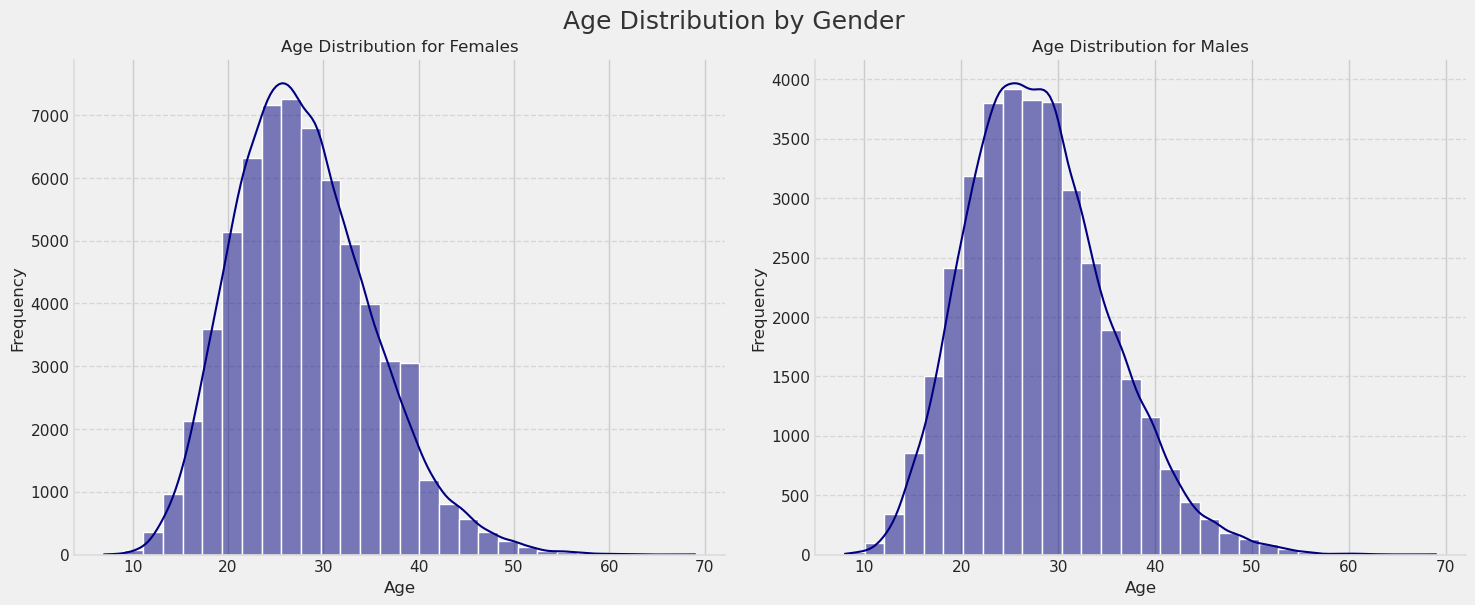

In [59]:
# Set a visually pleasing style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Gender F
sns.histplot(data=df_customer[df_customer['gender'] == 'F'], x="Age", color='navy', kde=True, ax=axes[0], bins=30)
axes[0].set(title='Age Distribution for Females', xlabel='Age', ylabel='Frequency')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for Gender M
sns.histplot(data=df_customer[df_customer['gender'] == 'M'], x="Age", color='navy', kde=True, ax=axes[1], bins=30)
axes[1].set(title='Age Distribution for Males', xlabel='Age', ylabel='Frequency')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Customize background color
fig.set_facecolor('#f0f0f0')
axes[0].set_facecolor('#f0f0f0')
axes[1].set_facecolor('#f0f0f0')

# Adjust layout
plt.tight_layout()

# Add a title for the entire figure
plt.suptitle('Age Distribution by Gender', fontsize=18, y=1.02, color='#333333')

# Remove spines
sns.despine()

# Add a subtle gray border to the plots
for ax in axes:
    ax.spines['top'].set_color('#dddddd')
    ax.spines['right'].set_color('#dddddd')
    ax.spines['bottom'].set_color('#dddddd')
    ax.spines['left'].set_color('#dddddd')

# Customize tick parameters
for ax in axes:
    ax.tick_params(axis='both', which='both', length=0)

# Show the plots
plt.show()

- Chúng ta có thể thấy rằng qua biểu đồ histogram thì giới tính Nam và Nữ không có sự khác nhau nhiều.
- Độ tuổi từ 20 - 35 là khoảng thời gian mua hàng nhiều nhất của cả hai giới tính
- Cả hai biểu đồ đều có dạng phân phối chuẩn

#### **_03.1.2. The avarage money spending base on Age and Gender_**

- Dựa vào bảng dữ liệu `transaction` chúng ta thấy số tiền mua hàng được tính dựa vào các thông số như `quantity`, `item_price`, `shipment_fee` và `promo_amount`. Dựa vào những thông số đó sẽ cho ra kết quả `total_amount` thể hiện tổng số tiền mua hàng của mỗi khách hàng
- Mỗi khách hàng có thể mua nhiều sản phẩm, vì vậy chúng ta sẽ thực hiện gộp chúng lại

In [60]:
df_amount_cus = df_transaction.groupby('customer_id', as_index =False)['total_amount'].sum()
df_amount_cus = df_amount_cus.groupby(['customer_id'])['total_amount'].sum().reset_index()

df_amount_cus_trans = df_customer[['customer_id' , 'gender' , 'Age']].merge(df_amount_cus , how = 'left' , on = 'customer_id')
df_amount_cus_trans


,customer_id,gender,Age,total_amount
0,2870,F,28,NaN
1,8193,F,30,NaN
2,7279,M,35,98661780.0
3,88813,M,33,NaN
4,82542,M,23,115702.0
...,...,...,...,...
99995,34743,M,23,26453036.0
99996,72065,M,26,59084450.0
99997,32818,F,31,296679636.0
99998,75597,M,23,NaN


- Để giải quyết bài toán số tiền trung bình theo nhóm tuổi hoặc giới tính chúng ta cần ghép hai bộ dữ liệu `customer` và `transaction`

**Biểu đồ thể hiện số tiền trung bình mà các nhóm tuổi mua hàng**

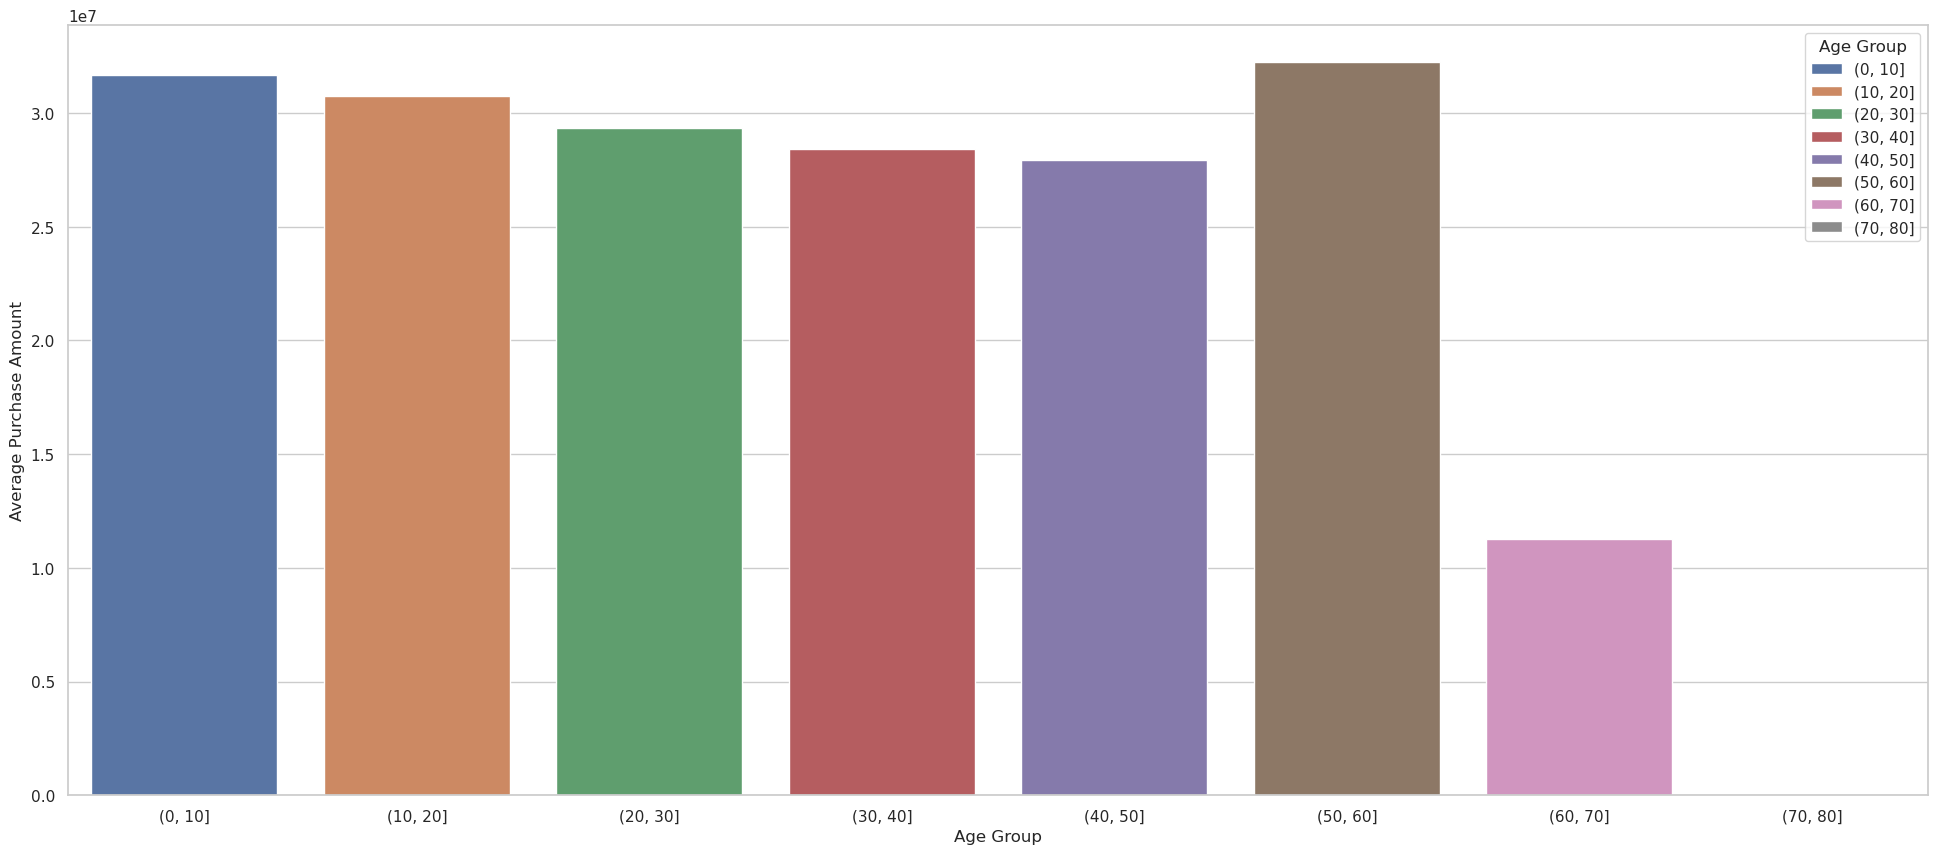

In [61]:
plt.figure(figsize=(24, 10))
age_bins = [0,10,20, 30, 40, 50, 60, 70, 80]
df_amount_cus_trans['Age Group'] = pd.cut(df_amount_cus_trans['Age'], bins=age_bins)
avg_purchase_by_age = df_amount_cus_trans.groupby(['Age Group'])['total_amount'].mean().reset_index()
sns.barplot(avg_purchase_by_age, x="Age Group", y="total_amount" , hue="Age Group")
plt.ylabel('Average Purchase Amount')
plt.show()

<Figure size 2400x1000 with 0 Axes>

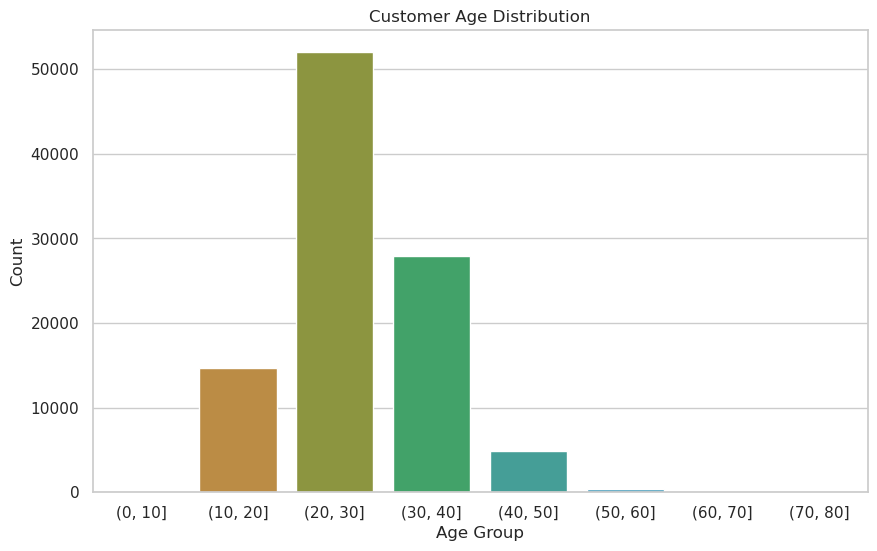

In [62]:
plt.figure(figsize=(24, 10))

age_labels = ['(0, 10]', '(10, 20]', '(20, 30]', '(30, 40]', '(40, 50]', '(50, 60]', '(60, 70]' , '(70, 80]']

plt.figure(figsize=(10, 6))
sns.countplot(data=df_amount_cus_trans, x='Age Group', order=age_labels , palette='husl')
plt.title('Customer Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

#### **_03.1.3. What items are the most purchasing by each Age Group or Gender?_**

In [63]:
df_product['masterCategory'].unique()

array(['Apparel', 'Accessories', 'Footwear', 'Personal Care',
       'Free Items', 'Sporting Goods', 'Home'], dtype=object)

- Dựa vào bảng dữ liệu `product` chúng ta thấy có một số loại sản phẩm như trong cột `masterCategory`. Dựa vào những thông số đó chúng ta đặt ra câu hỏi với mỗi nhóm tuổi và giới tính khác nhau thì họ thường mua loại sản phẩm nào.
- Bảng `product` có cột `id` tương ứng với cột `product_id` trong bảng dữ liệu `transaction`, vì vậy để có dữ liệu khách hàng mua loại sản phẩm gì chúng ta cần ghép 3 bộ dữ liệu lại với nhau.

In [64]:
df_trans_prod = df_transaction[['created_at','customer_id' , 'product_id']].merge(df_product[['product_id' , 'masterCategory' , 'gender']])
df_trans_prod_cate = df_trans_prod.groupby(['customer_id', 'masterCategory']).size().unstack().reset_index()
df_amount_cus_trans_cate = df_amount_cus_trans.merge(df_trans_prod , how = 'right' , on = 'customer_id')
df_amount_cus_trans_cate_age = df_amount_cus_trans_cate.groupby(['Age Group', 'masterCategory']).size().unstack()
df_amount_cus_trans_cate


,customer_id,gender_x,Age,total_amount,Age Group,created_at,product_id,masterCategory,gender_y
0,5868,F,23,199832.0,"(20, 30]",2018-07-29T15:22:01.458193Z,54728,Footwear,Men
1,82831,M,23,816065173.0,"(20, 30]",2021-01-15T19:52:40.793729Z,54728,Footwear,Men
2,47013,M,26,67156337.0,"(20, 30]",2020-06-04T14:54:13.726119Z,54728,Footwear,Men
3,17135,M,14,25000544.0,"(10, 20]",2019-02-05T08:29:50.613535Z,54728,Footwear,Men
4,70185,M,27,366786504.0,"(20, 30]",2020-11-04T14:20:44.351064Z,54728,Footwear,Men
...,...,...,...,...,...,...,...,...,...
1254580,9486,F,28,79435352.0,"(20, 30]",2021-01-15T14:09:04.388337Z,6385,Footwear,Men
1254581,30710,F,29,380358.0,"(20, 30]",2017-12-18T22:39:03.425067Z,6385,Footwear,Men
1254582,86532,F,32,66039607.0,"(30, 40]",2022-03-14T22:04:05.857842Z,6385,Footwear,Men
1254583,83374,M,29,14124494.0,"(20, 30]",2020-09-11T01:57:40.983766Z,6385,Footwear,Men


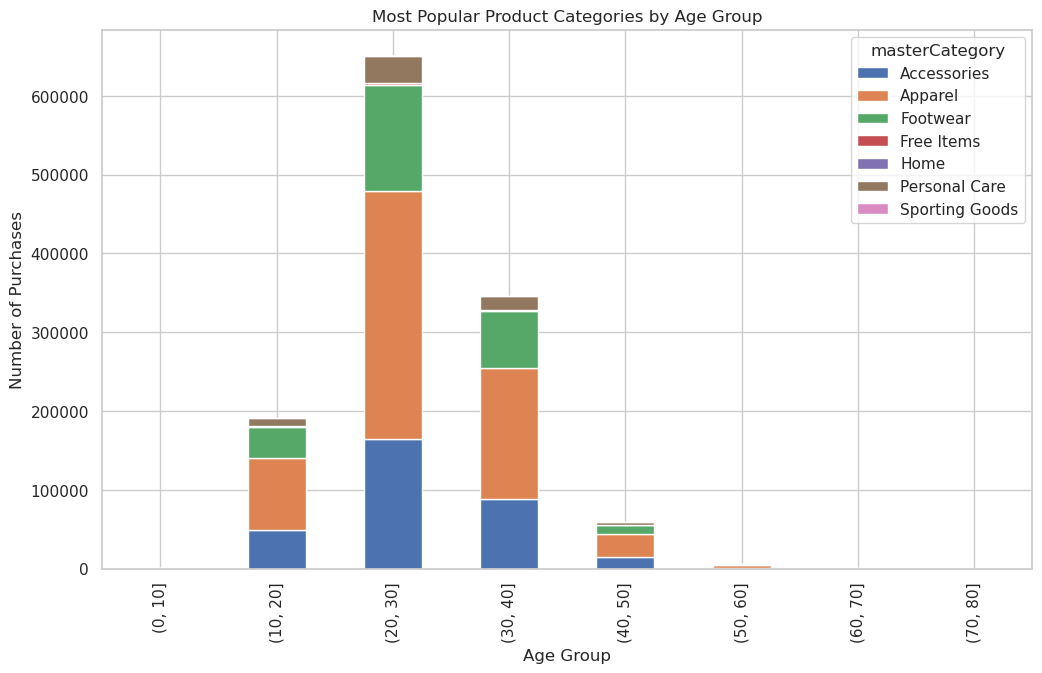

In [65]:
df_amount_cus_trans_cate_age.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Most Popular Product Categories by Age Group')
plt.ylabel('Number of Purchases')
plt.show()

##### Nhận xét:
- Chúng ta có thể thấy rằng ở nhóm tuổi `[20 -> 30]` tuổi có xu hướng mua đồ trên sàn thương mại điện tử hơn so với những lứa tuổi khác
- Khi tuổi càng cao thì họ càng mua ít dần, tuy nhiên khi xem xét tổng số tiền mua trung bình của từng lứa tuổi thì chúng ta lại thấy rằng đối với khung tuổi `[50 -> 60]` họ mua rất ít nhưng giá tiền họ trả lại là cao nhất.

- Và `Apparel` là dòng sản phẩm được ưa chuộng mua nhiều nhất

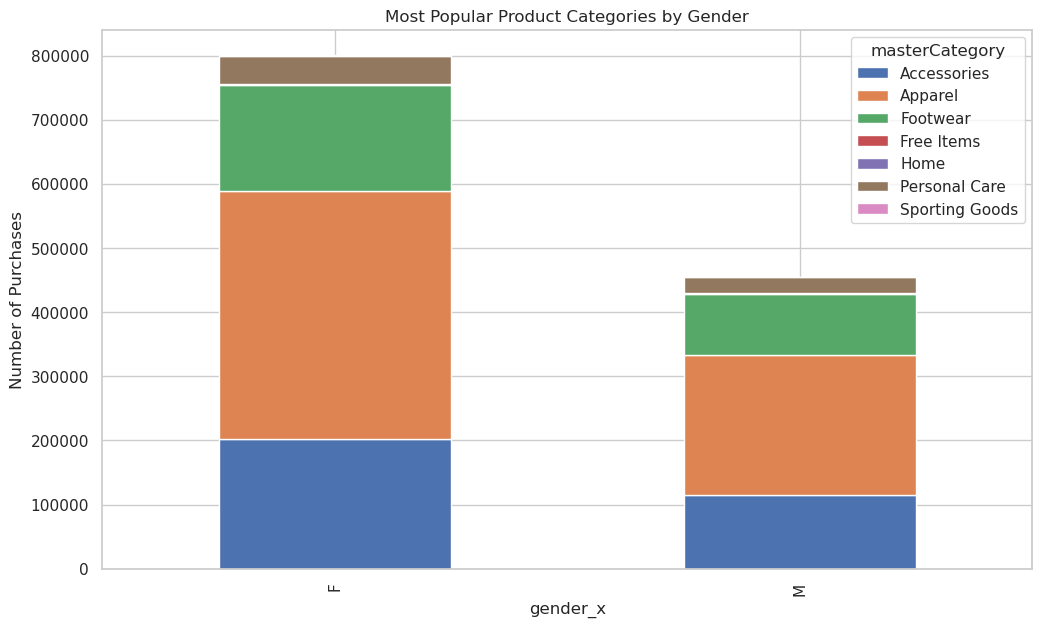

In [66]:
df_amount_cus_trans_cate_gender = df_amount_cus_trans_cate.groupby(['gender_x', 'masterCategory']).size().unstack()
df_amount_cus_trans_cate_gender.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Most Popular Product Categories by Gender')
plt.ylabel('Number of Purchases')
plt.show()

##### Nhận xét:
- Chúng ta có thể thấy rằng ở nhóm giới tính Female có xu hướng mua đồ trên sàn thương mại điện tử nhiều hơn so với nhóm giới tính Male
- Và `Apparel` là dòng sản phẩm được ưa chuộng mua nhiều nhất

### **_03.2. Question number 2: `Which products are more inclined to be bought together?`_**

#### **_03.2.1. Pre-process Data:_**

**Merge dữ liệu**

In [67]:
# merge dữ liệu 3 bảng customer, product, transaction
df_transaction_cus = df_transaction.merge(df_customer , how = 'left' , on = 'customer_id')
df_transaction_cus_prod = df_transaction_cus.merge(df_product , how = 'left' , on = 'product_id')

df_transaction_cus_prod.head(2)

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,first_name,last_name,username,email,gender_x,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,Age,gender_y,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247,Titin,Pratiwi,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,498c2a5e_bafe_42cc_94f9_2832ac5e1f6b@startupca...,F,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.122897,106.876500,Jakarta Raya,Indonesia,2018-07-28,23,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,28,Men,Apparel,Topwear,Sweaters,Green,Fall,2011.0,Casual,Puma Men Knitted Vest Green Sweater


#### **_03.2.2. Cross Selling:_**

- Bán chéo là khả năng bán nhiều sản phẩm hơn cho khách hàng bằng cách phân tích xu hướng mua sắm của khách hàng cũng như các xu hướng và mô hình mua sắm chung có điểm chung với mô hình mua sắm của khách hàng. Thường xuyên hơn không, những sản phẩm được đề xuất này sẽ rất hấp dẫn. Nhà bán lẻ thường sẽ cung cấp cho bạn một gói sản phẩm với một số ưu đãi hấp dẫn và rất có thể chúng ta sẽ mua các sản phẩm đi kèm thay vì chỉ mua sản phẩm ban đầu.

- Vì vậy, chúng ta sẽ nghiên cứu các giao dịch của khách hàng và tìm ra những bổ sung tiềm năng cho nhu cầu ban đầu của khách hàng và đưa ra gợi ý cho khách hàng với hy vọng và ý định rằng họ mua chúng sẽ mang lại lợi ích cho cả khách hàng cũng như sàn thương mại điện tử.

- Trong phần này, chúng ta sẽ khám phá việc khai thác association rule-mining, một kỹ thuật mạnh mẽ có thể được sử dụng để bán chéo, sau đó chúng ta áp dụng khái niệm phân tích giỏ hàng thị trường cho tập dữ liệu giao dịch bán lẻ của mình.



#### **_03.2.3. Algorithms:_**

- Một số thuật toán nổi tiếng là Apriori, Eclat và FP-Growth, nhưng chúng chỉ thực hiện được một nửa công việc vì chúng là các thuật toán để khai thác các tập phổ biến. Một bước khác cần được thực hiện sau đó để tạo quy tắc từ các tập phổ biến được tìm thấy trong cơ sở dữ liệu.

- Nút thắt lớn nhất trong bất kỳ thuật toán khai thác luật kết hợp nào là việc tạo ra các tập phổ biến. Nếu tập dữ liệu giao dịch có k sản phẩm duy nhất thì có khả năng chúng ta có 2^k tập mục có thể.

**Apriori**

Trong phần này chúng ta sử dụng phương pháp Apriori vì vậy chúng ta sẽ nói sơ qua Apriori sẽ làm những gì.

Apriori sử dụng chiến lược tìm kiếm theo chiều rộng để tính độ hỗ trợ của các tập mục và sử dụng hàm tạo ứng cử viên để khai thác thuộc tính đóng xuống của hỗ trợ. Vì vậy, trước tiên thuật toán sẽ tạo các tập mục này và sau đó tiến hành tìm các tập phổ biến. Đối với khoảng 100 sản phẩm duy nhất, số lượng tập mục có thể có là rất lớn và cho thấy thuật toán Apriori cực kỳ tốn kém về mặt tính toán.


#### **_03.2.4. Implement:_**

In [68]:
df_transaction_cus_prod['masterCategory'].unique()

array(['Footwear', 'Apparel', 'Accessories', 'Personal Care',
       'Free Items', 'Sporting Goods', 'Home'], dtype=object)

**Số lượng sản phẩm trung bình được mua trong một giao dịch.**

In [69]:
df_trans_cate = df_transaction.merge(df_product[['product_id' , 'masterCategory']] , how = 'left' , on = 'product_id')

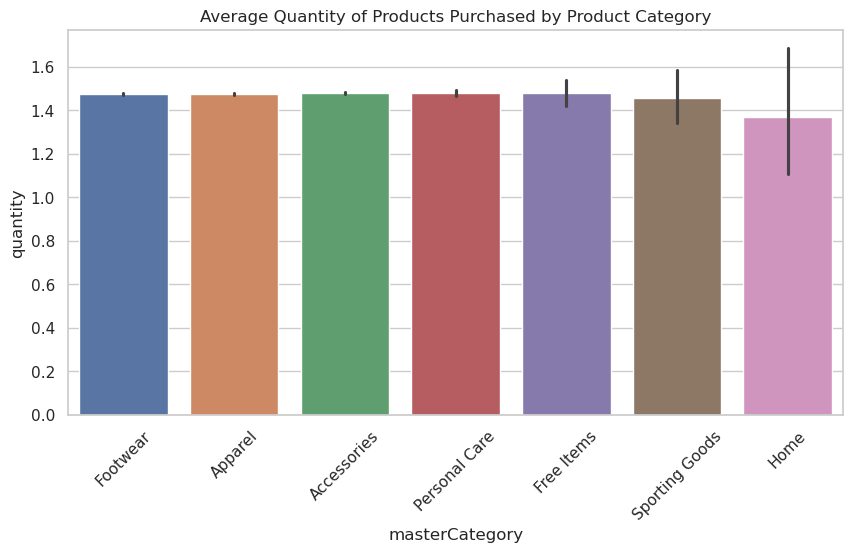

In [70]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_trans_cate, x='masterCategory', y='quantity', hue="masterCategory")
plt.title('Average Quantity of Products Purchased by Product Category')
plt.xticks(rotation=45)
plt.show()

- Chúng ta nhận thấy rằng có 6 `masterCategory` tức danh mục sản phẩm chính được bán ra trong sàn thương mại điện tử bao gồm: 'Footwear', 'Apparel', 'Accessories', 'Personal Care', 'Free Items', 'Sporting Goods', 'Home'.
- Các danh mục sản phẩm chính `masterCategory` được bán ra đồng đều. Vì vậy khi sử dụng thuật toán apriori chúng ta sẽ đảm bảo dữ liệu cân bằng.

- Sử dụng thuật toán Apriori để xác định những sản phẩm thường xuyên mua cùng nhau và đề xuất các loại sản phẩm phù hợp theo dữ liệu quá khứ

In [71]:
basket = df_transaction_cus_prod.groupby(['customer_id', 'masterCategory'])['quantity'].sum().unstack().fillna(0)
basket[basket > 0] = 1
basket

masterCategory,Accessories,Apparel,Footwear,Free Items,Home,Personal Care,Sporting Goods
customer_id,,,,,,,
3,1.0,1.0,1.0,0.0,0.0,1.0,0.0
8,0.0,1.0,1.0,1.0,0.0,1.0,0.0
9,1.0,1.0,0.0,0.0,0.0,1.0,0.0
11,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15,1.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
99992,1.0,1.0,1.0,0.0,0.0,1.0,0.0
99995,1.0,1.0,1.0,0.0,0.0,1.0,1.0
99997,1.0,0.0,0.0,0.0,0.0,0.0,0.0


- min_support (Minimum Support): Tham số min_support đề cập đến độ Support tối thiểu cần thiết để một tập mục được coi là frequent. Support là thước đo tần suất một tập hợp mục cụ thể xuất hiện trong tập dữ liệu. Giá trị min_support cao hơn sẽ dẫn đến ít frequent itemsets, có khả năng bỏ lỡ các liên kết thú vị nhưng ít thường xuyên hơn. Ngược lại, min_support thấp hơn có thể bao gồm quá nhiều tập mục, làm tăng độ phức tạp tính toán và có thể bao gồm các liên kết ít ý nghĩa hơn.

- min_threshold (Minimum Threshold): Thuật ngữ min_threshold thường được sử dụng trong bối cảnh độ tin cậy hoặc độ nâng của các luật kết hợp. Trong hầu hết các hoạt động triển khai, tham số này đặt độ tin cậy tối thiểu hoặc giá trị nâng cao để một quy tắc kết hợp được coi là quan trọng.

**Chúng ta chọn min_support = 0.05, min_threshold = 1**

In [72]:
# Chuyển đổi dữ liệu thành định dạng được mã hóa one-hot
basket = df_transaction_cus_prod.groupby(['customer_id', 'masterCategory'])['quantity'].sum().unstack().fillna(0)

# Chuyển đổi giá trị số lượng sang nhị phân (1 nếu đã mua, 0 nếu không)
basket[basket > 0] = 1

# Thực hiện thuật toán Apriori để tìm tập mục thường xuyên
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

# Tạo quy tắc kết hợp
association_rules_transaction_cus = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Lọc và sắp xếp các quy tắc cho đề xuất
recommended_rules = association_rules_transaction_cus[association_rules_transaction_cus['lift'] > 1.0].sort_values(by='lift', ascending=False)

# Hiển thị các quy tắc được đề xuất
recommended_rules[['antecedents', 'consequents', 'support', 'lift']]

,antecedents,consequents,support,lift
53,"(Personal Care, Apparel)","(Accessories, Footwear)",0.387279,1.470263
56,"(Accessories, Footwear)","(Personal Care, Apparel)",0.387279,1.470263
58,(Personal Care),"(Accessories, Apparel, Footwear)",0.387279,1.459882
51,"(Accessories, Apparel, Footwear)",(Personal Care),0.387279,1.459882
57,"(Apparel, Footwear)","(Personal Care, Accessories)",0.387279,1.421896
...,...,...,...,...
12,(Personal Care),(Apparel),0.433724,1.096979
9,(Footwear),(Apparel),0.654058,1.042902
8,(Apparel),(Footwear),0.654058,1.042902
1,(Apparel),(Accessories),0.680544,1.033148


**Trực quan hóa các liên kết**

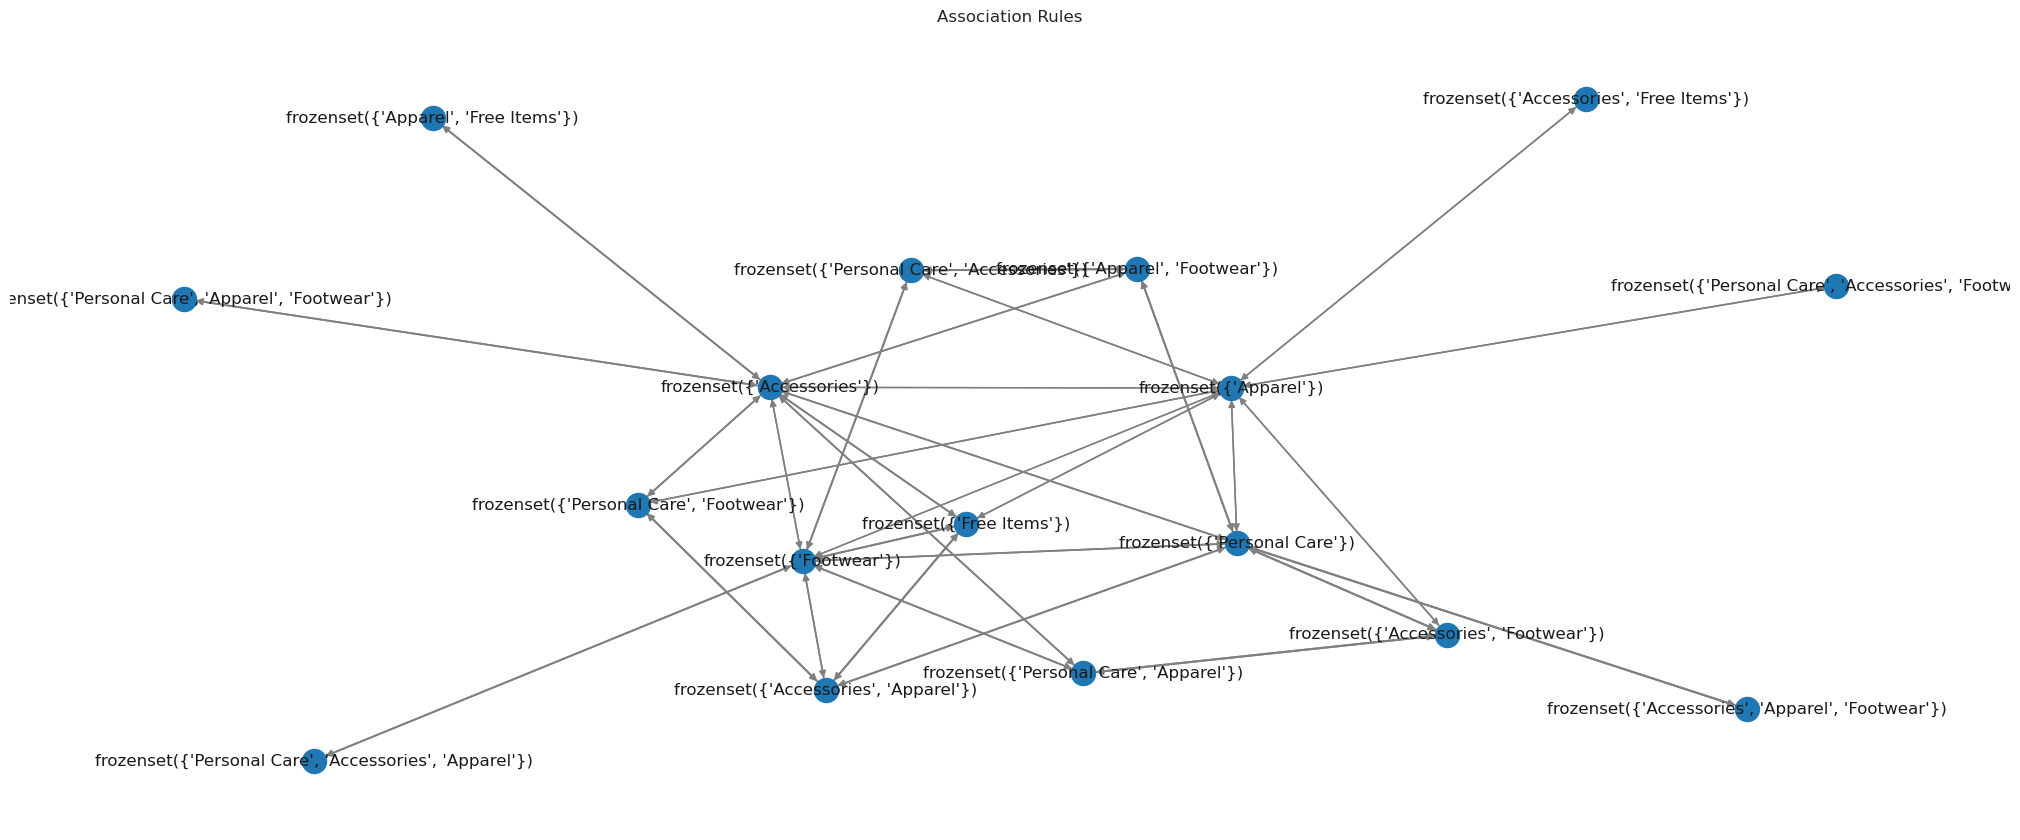

In [73]:
# Network Graph Visualization
G = nx.DiGraph()
plt.figure(figsize=(20, 8))
for _, row in recommended_rules.iterrows():
    G.add_edge(str(row['antecedents']), str(row['consequents']), weight=row['lift'])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, edge_color='gray', width=[G[u][v]['weight'] for u,v in G.edges()])
plt.title("Association Rules")
plt.show()

**Nhận xét**
- Dựa vào các luật kết hợp trên chúng ta có thể thấy một số trường hợp như sau:
    - Khi khách hàng mua `Personal Care` và `Apparel` thì khi đó khách hàng cũng sẽ mua `Footwear` và `Accessories`
    - Hoặc với bộ itemset chứa 3 hạng mục thì, khách hàng mua `Footwear, Apparel, Accessories` khi đó khách hàng sẽ mua thêm `Personal Care`
    - Hầu hết các bộ itemset chứa 1 hạng mục là phần nhiều

### **_03.3. Question number 3: `What is the customer segment that contributed the most to our company?`_**

#### **_03.3.1. Pre-processing data_**

In [74]:
df_transaction = pd.read_csv('Data/transaction_new.csv')
df_transaction.head(2)

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526


In [75]:
df_customer = pd.read_csv("Data/customer.csv")
df_customer['first_join_date'] = pd.to_datetime(df_customer['first_join_date'])
df_customer['birthdate'] = pd.to_datetime(df_customer['birthdate'])
df_customer["full_name"] = df_customer['first_name'].astype(str) +" "+ df_customer["last_name"]
df_customer.head(2)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,full_name
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,Lala Maryati
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,Maimunah Laksmiwati


#### **_03.3.2. Customer segment based on total spending money_**
- Chúng ta phân loại khách hàng thành ba phân khúc: Giá trị thấp (Low-Value) , Giá trị trung bình (Mid-Value) và Giá trị cao (High-Value) dựa trên tổng số tiền mua hàng của họ. Điều này giúp chúng ta hiểu khách hàng nào đóng góp nhiều nhất vào doanh thu của bạn.
- Để có thể phân ra ba phân khúc như vậy, chúng ta sẽ cần một ngưỡng threshold, chúng ta sẽ sử dụng `low_value_threshold` và `high_value_threshold`

In [76]:
# Phân khúc khách hàng theo tổng số tiền mua hàng
# Xác định ngưỡng để phân đoạn
low_value_threshold = 300000
high_value_threshold = 800000

# Tạo hàm phân loại khách hàng dựa trên tổng số tiền mua hàng
def categorize_customers(total_purchase_amount):
    if total_purchase_amount <= low_value_threshold:
        return "Low-Value"
    elif total_purchase_amount <= high_value_threshold:
        return "Mid-Value"
    else:
        return "High-Value"

# Áp dụng chức năng phân loại để tạo cột mới 'Customer Segment'
df_transaction['Customer Segment'] = df_transaction['total_amount'].apply(categorize_customers)

segment_counts = df_transaction['Customer Segment'].value_counts()
segment_counts

Customer Segment
High-Value    452878
Low-Value     424389
Mid-Value     377318
Name: count, dtype: int64

**Trực quan hóa để hiểu rõ hơn**

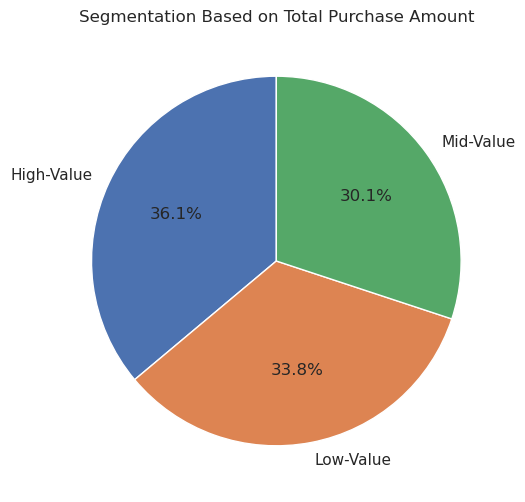

In [77]:
plt.figure(figsize=(6, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Segmentation Based on Total Purchase Amount')
plt.show()

#### **_03.3.3. Analyzing in Recency, Frequency, and Monetary_**

Chúng ta đang phân tích hành vi của khách hàng bằng cách xem xét các tiêu chí như: 
- Recency đo lường mức độ mua hàng gần đây của khách hàng; 
- Frequency định lượng tần suất họ mua;
- Monetary đại diện cho tổng chi tiêu của họ. 

Điều này giống như việc mô tả đặc điểm của khách hàng bằng tần suất họ tương tác với sàn thương mại điện tử Fashion Campus và mức độ đầu tư của họ vào đó.

In [78]:
df_transaction['created_at'] = pd.to_datetime(df_transaction['created_at']).dt.tz_localize(None)
df_transaction['shipment_date_limit'] = pd.to_datetime(df_transaction['shipment_date_limit']).dt.tz_localize(None)

In [79]:
# Step 1: Calculate Recency
analysis_date = pd.to_datetime('2023-12-14')  
recency = df_transaction.groupby('customer_id')['created_at'].max()
recency = (analysis_date - recency).dt.days  # Calculate recency in days

# Step 2: Calculate Frequency
frequency = df_transaction.groupby('customer_id').size()

# Step 3: Calculate Monetary
monetary = df_transaction.groupby('customer_id')['total_amount'].sum()

# Step 4: Create RFM DataFrame
rfm_df = pd.DataFrame({'Recency': recency, 'Frequency': frequency, 'Monetary': monetary})

**Tiêu chí phân khúc**

Chúng ta đã xác định tiêu chí và ngưỡng cho từng thành phần RFM để phân loại khách hàng thành các phân khúc như High, Medium, Low hoặc Không hoạt động đối với Recency và High, Medium, Low hoặc Rất cao đối với Frequency và Monetary. Điều này giống như việc phân loại các nhân vật dựa trên đặc điểm của họ, chẳng hạn như tuổi tác, tính cách và vai trò trong câu chuyện.

In [80]:
# Step 5: Segmentation
# Xác định tiêu chí phân khúc (bạn có thể điều chỉnh các ngưỡng này)
recency_bins = [0, 300, 900, 1800, 10000]
frequency_bins = [1, 2, 5, 10, 500]
monetary_bins = [0, 200000, 500000, 1000000, 50000000]

rfm_df['Recency_Score'] = pd.cut(rfm_df['Recency'], bins=recency_bins, labels=['High', 'Medium', 'Low', 'Inactive'], right=False)
rfm_df['Frequency_Score'] = pd.cut(rfm_df['Frequency'], bins=frequency_bins, labels=['Low', 'Medium', 'High', 'Very High'], right=False)
rfm_df['Monetary_Score'] = pd.cut(rfm_df['Monetary'], bins=monetary_bins, labels=['Low', 'Medium', 'High', 'Very High'], right=False)

rfm_df

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
customer_id,,,,,,
3,535,71,45842098,Medium,Very High,Very High
8,577,8,4758601,Medium,High,Very High
9,564,8,4113630,Medium,High,Very High
11,646,1,197533,Medium,Low,Low
15,707,9,6447246,Medium,High,Very High
...,...,...,...,...,...,...
99992,567,17,14033384,Medium,Very High,Very High
99995,502,79,58958135,Medium,Very High,NaN
99997,1327,1,226461,Low,Low,Medium


**Trực quan hóa phân đoạn**

Chúng ta đang hình dung sự phân bổ khách hàng trong từng phân khúc về recency, frequency, monetary. Hình dung này giúp chúng ta nắm bắt được sự phân bố của các đối tượng khách hàng khác nhau trong bộ dữ liệu của mình

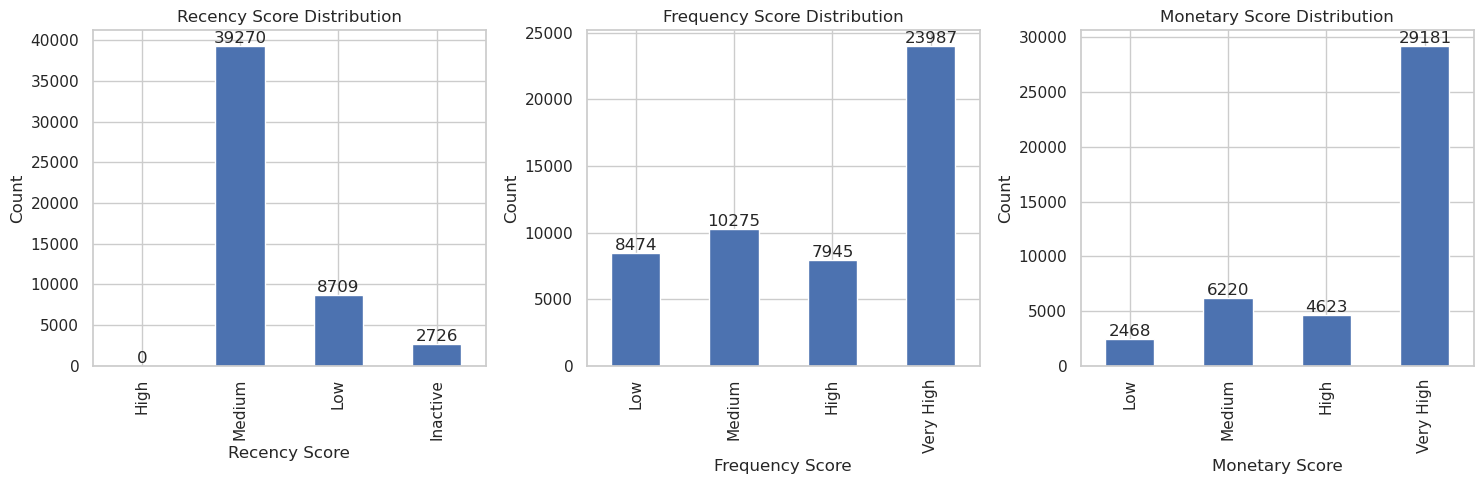

In [81]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Visualize the Recency Score distribution
recency_counts = rfm_df['Recency_Score'].value_counts().sort_index()
recency_counts.plot(kind='bar', ax=axes[0])
axes[0].set_title('Recency Score Distribution')
axes[0].set_xlabel('Recency Score')
axes[0].set_ylabel('Count')

for i, v in enumerate(recency_counts):
    axes[0].text(i, v + 10, str(v), ha='center', va='bottom')

# Visualize the Frequency Score distribution
frequency_counts = rfm_df['Frequency_Score'].value_counts().sort_index()
frequency_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('Frequency Score Distribution')
axes[1].set_xlabel('Frequency Score')
axes[1].set_ylabel('Count')

for i, v in enumerate(frequency_counts):
    axes[1].text(i, v + 10, str(v), ha='center', va='bottom')

# Visualize the Monetary Score distribution
monetary_counts = rfm_df['Monetary_Score'].value_counts().sort_index()
monetary_counts.plot(kind='bar', ax=axes[2])
axes[2].set_title('Monetary Score Distribution')
axes[2].set_xlabel('Monetary Score')
axes[2].set_ylabel('Count')

for i, v in enumerate(monetary_counts):
    axes[2].text(i, v + 10, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### **_03.3.4. Using Kmeans to distribute Customer Segment_**

**Xử lý cột `Age` tương tự như các phần trước**

In [82]:
from datetime import datetime

age_labels = ['(0, 10]', '(10, 20]', '(20, 30]', '(30, 40]', '(40, 50]', '(50, 60]', '(60, 70]' , '(70, 80]']
df_customer['Age'] = ((datetime.now() - df_customer['birthdate']).dt.days / 365.25).round().astype(np.int64)

In [83]:
df_product = pd.read_csv("Data/product.csv")
df_product = df_product.rename(columns = {'id' : 'product_id'})
df_product.head(2)

,product_id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans


In [84]:
df_transaction_cus = df_transaction.merge(df_customer , how = 'left' , on = 'customer_id')
df_transaction_cus.head(2)

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,Customer Segment,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,full_name,Age
0,2018-07-29 15:22:01.458193,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676,-8.227893,111.969107,199832,54728,1,191247,Low-Value,Titin,Pratiwi,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,498c2a5e_bafe_42cc_94f9_2832ac5e1f6b@startupca...,F,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.122897,106.876500,Jakarta Raya,Indonesia,2018-07-28,Titin Pratiwi,23
1,2018-07-30 12:40:22.365620,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03 01:29:03.415705,3.013470,107.802514,155526,16193,1,145526,Low-Value,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,Uchita Hassanah,28


**Tính số ngày tham gia sàn thương mại điện tử cho tới thời điểm hiện tại**

In [85]:
from datetime import datetime

df_transaction_cus['join_time'] = ((datetime.now() - df_transaction_cus['first_join_date']).dt.days/ 30).round().astype(np.int64)
total_purchase_per_customer = df_transaction_cus.groupby('full_name')['total_amount'].sum()
total_purchase_per_customer

full_name
Abyasa Ardianto         330273
Abyasa Firgantoro      8115383
Abyasa Firmansyah      1229803
Abyasa Hardiansyah      250015
Abyasa Haryanto        2302516
                        ...   
Zulfa Yolanda         56270624
Zulfa Yulianti         4731769
Zulfa Yuliarti          402317
Zulfa Yuniar           1871907
Zulfa Zulaika           548662
Name: total_amount, Length: 28592, dtype: int64

- Để phân khúc khách hàng dựa vào mô hình KMeans, chúng ta sẽ chọn một số trường dữ liệu như `total_amount_sum`, `total_amount_mean`, `quantity_mean`, `Age`, `join_time`
- Với mô hình Kmeans chúng ta có thể chọn số cụm bằng tham số `n_clusters`. Trong phần này chúng ta sẽ chọn số cụm là 5 tương tứng với từng phân khúc khách hàng như: `bronze` , `silver`, `gold` , `platinum` , `diamond`

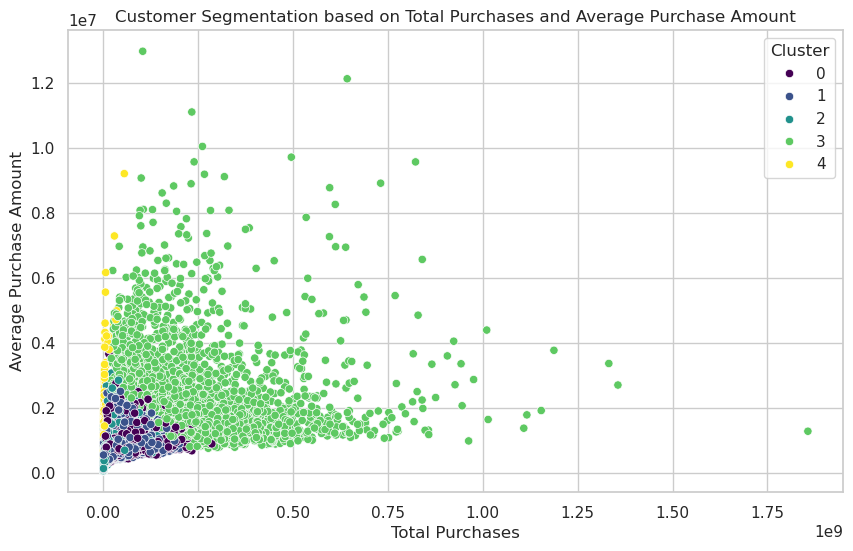

,Cluster,Total Purchases,Average Purchase Amount,Average Quantity,Max Age,Max Join Time,rank
0,0,4.191655e+07,8.073836e+05,1.440378,39.167024,63.706958,bronze
1,1,3.395497e+07,7.673467e+05,1.421223,26.484523,72.321925,silver
2,2,1.482793e+07,6.388966e+05,1.361310,27.042320,34.795507,gold
3,3,2.455028e+08,2.292362e+06,1.557600,31.648341,66.762850,platinum
4,4,4.493464e+06,1.607412e+06,5.578170,28.474227,46.226804,diamond


In [86]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Tạo tập dữ liệu cấp độ khách hàng với các số liệu liên quan để phân khúc
customer_data = df_transaction_cus.groupby('full_name').agg({
    'total_amount': ['sum', 'mean'],
    'quantity': 'mean',
    'Age': 'max' , 
    'join_time' : 'max'
}).reset_index()

customer_data.columns = ['full_name', 'Total Purchases', 'Average Purchase Amount' , 'Average Quantity' , 'Max Age' , 'Max Join Time']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['Total Purchases', 'Average Purchase Amount' , 'Average Quantity' , 'Max Age' , 'Max Join Time']])

# Gán các giá trị bị thiếu bằng giá trị trung bình
imputer = SimpleImputer(strategy='mean')
scaled_data_imputed = imputer.fit_transform(scaled_data)

# Áp dụng phân cụm KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data_imputed)

# Trực quan hóa và giải thích các cụm
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='Total Purchases', y='Average Purchase Amount', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation based on Total Purchases and Average Purchase Amount')
plt.show()

# Analyze other metrics by cluster
cluster_summary = customer_data.groupby('Cluster').agg({
    'Total Purchases': 'mean',
    'Average Purchase Amount': 'mean',
    'Average Quantity': 'mean' , 
    'Max Age': 'mean',
    'Max Join Time': 'mean'
}).reset_index()

rank = pd.DataFrame(data = {'Cluster' : [0,1,2,3 , 4] , 'rank' : ['bronze' , 'silver', 'gold' , 'platinum' , 'diamond']})
cluster_summary = cluster_summary.merge(rank , how = 'left' , on = 'Cluster')
cluster_summary

- Chúng ta có thể thấy rằng với khách hàng có rank `diamond` sẽ có tổng tiền sử dụng vào sàn thương mại điện tử lớn nhất `Total Purchases` và `Average Purchase Amount`. Bên cạch đó còn có một số thông tin như số lượng trung bình mua là 1.4, số tuổi là 31.5 hoặc thời gian tham gia vào sàn thương mại điện tử cũng khá lớn: 66.51

### **_03.4. Question number 4: `How do monthly or weekly sales trends manifest in the total sales figures? Are there forecasts for future sales?`_**

  > Mục tiêu: Dự đoán được doanh thu của công ty từ đó có thể đưa ra các chiến lược bán hàng hợp lý
   => ta nhận thấy lượng toltal sales tăng dần theo năm, tuy nhiên đến giữa khoảng 2022 có dấu hiệu đi xuống, vì thế chúng tôi tập trung đẩy mạnh vào marketing nhằm nâng cao doanh thu mua hàng
  
1. Tập trung vào Digital Marketing:
Nâng cấp trang web và di động: Tối ưu hóa trải nghiệm người dùng để tăng tỷ lệ chuyển đổi.
Sử dụng nền tảng mạng xã hội: Tạo nội dung hấp dẫn và tương tác với khách hàng thông qua các kênh như Instagram, Facebook, TikTok.
Email Marketing: Xây dựng danh sách email và triển khai chiến lược gửi email hiệu quả với thông tin sản phẩm, khuyến mãi, và sự kiện.
2. Kế hoạch Content Marketing:
Blog và Video: Tạo nội dung hữu ích về thời trang, xu hướng mới, cách phối đồ, và hướng dẫn thời trang.
Collaboration và Influencer Marketing: Hợp tác với các influencer hoặc blogger thời trang để quảng bá sản phẩm của bạn.
3. Phát triển Chương trình Thưởng và Khuyến mãi:
Loyalty Program: Tạo chương trình thưởng để khích lệ khách hàng quay lại mua hàng và tăng tính trung thành.
Khuyến mãi đặc biệt: Áp dụng chiến lược giảm giá, quà tặng hoặc ưu đãi cho các sự kiện đặc biệt như Black Friday, Giáng sinh, hay sinh nhật công ty

In [87]:
df_transaction = pd.read_csv('Data/transaction_new.csv')
df_transaction_trend = df_transaction.copy()

#### **_03.4.1. Frequency of shopping days to determine peak shopping times (e.g., weekends, holidays, end of the month)_**


- Chúng ta có thể thấy rằng một số đơn đặt hàng trong cột `payment_status` có thể `Success` hoặc `Failed`, vì vậy chúng ta sẽ không xét tới những đơn đặt hàng bị hủy bỏ mà chỉ tập trung vào những đơn đặt hàng thành công

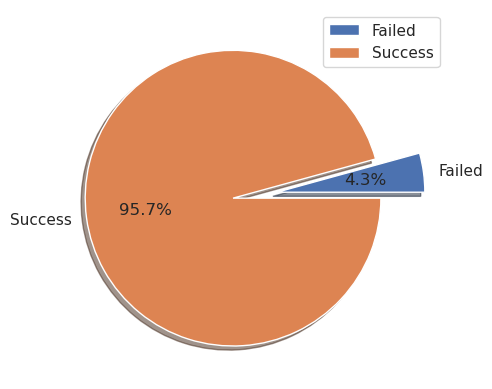

In [88]:
explodeSize = [0.1, 0.2]
payStatus = df_transaction.groupby(['payment_status'])['payment_status'].count()
plt.pie(payStatus, labels = ['Failed', 'Success'], shadow = True, autopct='%1.1f%%', explode = explodeSize)
plt.legend()

Tỉ lệ Failed chiếm 4.3%, vì vậy chúng ta sẽ loại bỏ những giao dịch này.

In [89]:
df_transaction = df_transaction[df_transaction['payment_status'] == 'Success']

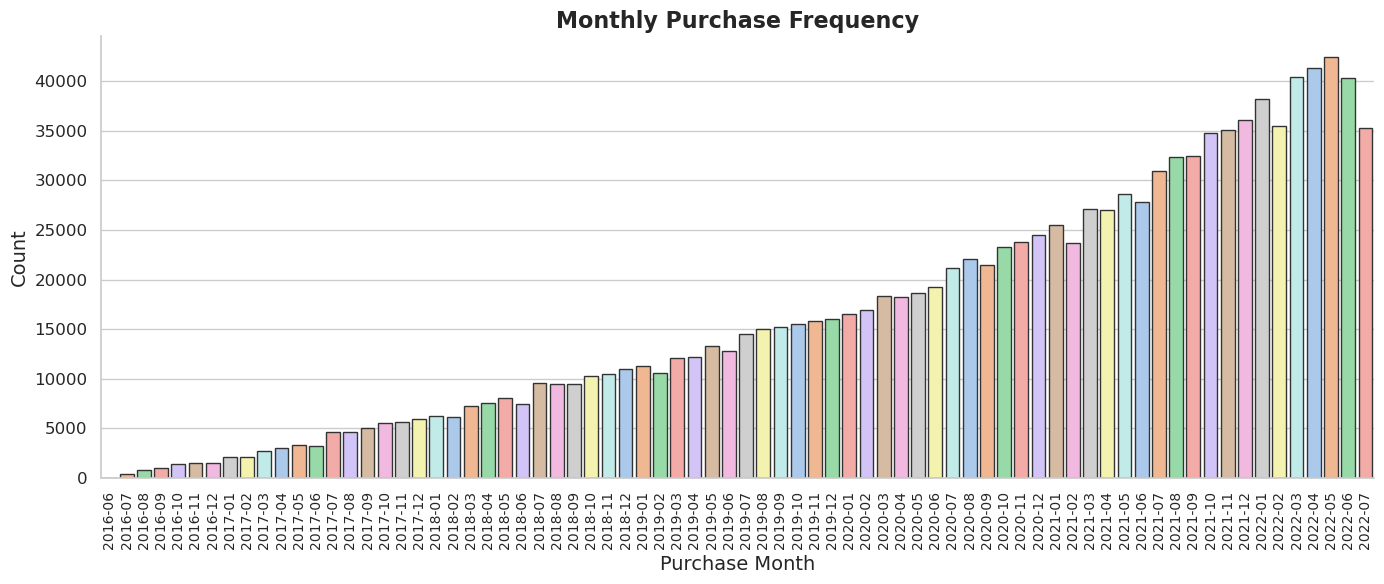

In [90]:
fig, ax = plt.subplots(figsize=(14, 6))

# Convert 'created_at' to datetime
df_transaction['created_at'] = pd.to_datetime(df_transaction['created_at'])

# Remove timezone information if present
df_transaction['created_at'] = df_transaction['created_at'].dt.tz_localize(None)

# Extract 'Purchase Month'
df_transaction['Purchase Month'] = df_transaction['created_at'].dt.to_period('M')

# Plotting with the default Seaborn palette
sns.countplot(data=df_transaction, x='Purchase Month', 
        order=sorted(df_transaction['Purchase Month'].unique()), edgecolor='0.2', palette='pastel', legend=False)

# Customize the plot
ax.set_title('Monthly Purchase Frequency', fontsize=16, weight='bold')
ax.set_xlabel('Purchase Month', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.tick_params(axis='x', rotation=90, labelsize=10)
ax.tick_params(axis='y', labelsize=12)
sns.despine()

# Display the plot
plt.tight_layout()
plt.show()

##### Nhận xét
- Dường như sàn thương mại điện tử phát triển rất tốt, số lượng giao dịch mua hàng ngày càng tăng theo thời gian từ năm 2016 tới năm 2022.
- Dường như trong giai đoạn dịch covid-19 đã làm cho lượng giao dịch tăng lên rất nhiều.

#### **_03.4.2. Which season will customers buy the most?_**

Khách hàng sẽ mua sắm theo mùa, có một số mùa thường như cầu mua sắm sẽ nhiều hơn như mùa hè hoặc mùa đông. Vì vậy chúng ta sẽ xem rằng các mùa có sự khác nhau về nhu cầu mua sắm hay không

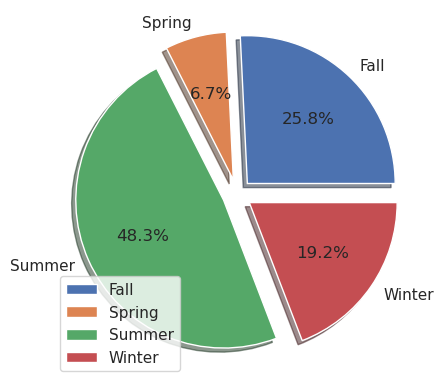

In [91]:
season = df_product.groupby(['season'])['season'].count()
explodeSize = [0.1, 0.1, 0.1, 0.1]
plt.pie(season, labels = ['Fall', 'Spring', 'Summer', 'Winter'], shadow = True, autopct='%1.1f%%', explode = explodeSize)
plt.legend()

- Mùa Hè là thời điểm mà doanh thu của Fashion Campus tăng mạnh nhất, chiếm 48.3%
- Mùa Xuân là thời điểm doanh thu thấp nhất chỉ với 6.7%

#### **_03.4.3. Analyzing revenue trends over time_**

**1. Monthly trends in total sales volume**

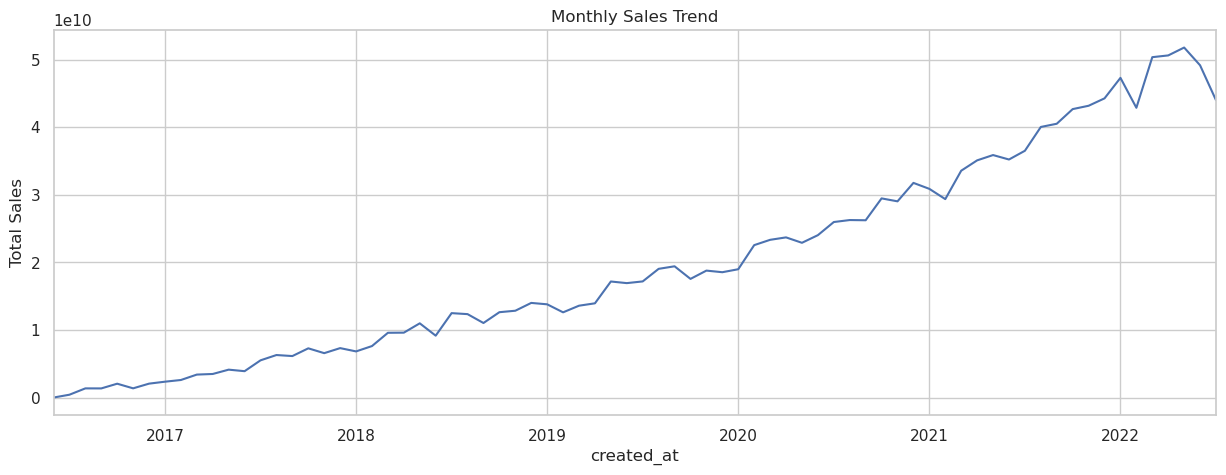

In [92]:
df_transaction_trend['created_at'] = pd.to_datetime(df_transaction_trend['created_at'])
df_transaction_trend.set_index('created_at', inplace=True)

# Monthly sales trend
plt.figure(figsize=(15, 5))
monthly_sales = df_transaction_trend['total_amount'].resample('M').sum()
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.show()


**2. Weekly trends in total sales volume**

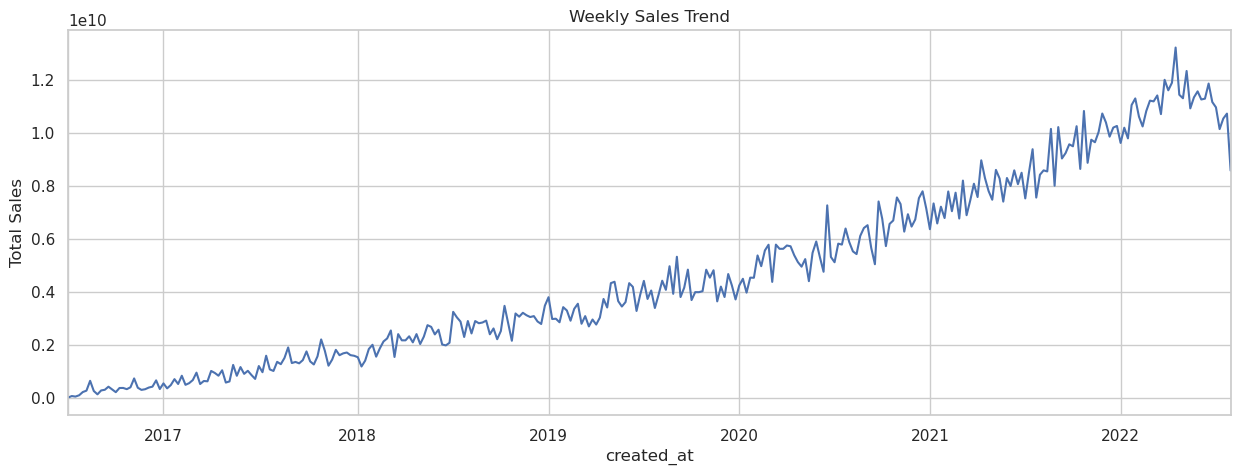

In [93]:
# Weekly sales trend (optional)
plt.figure(figsize=(15, 5))

weekly_sales = df_transaction_trend['total_amount'].resample('W').sum()
weekly_sales.plot()
plt.title('Weekly Sales Trend')
plt.ylabel('Total Sales')
plt.show()

**3. Daily trends in total sales volume**

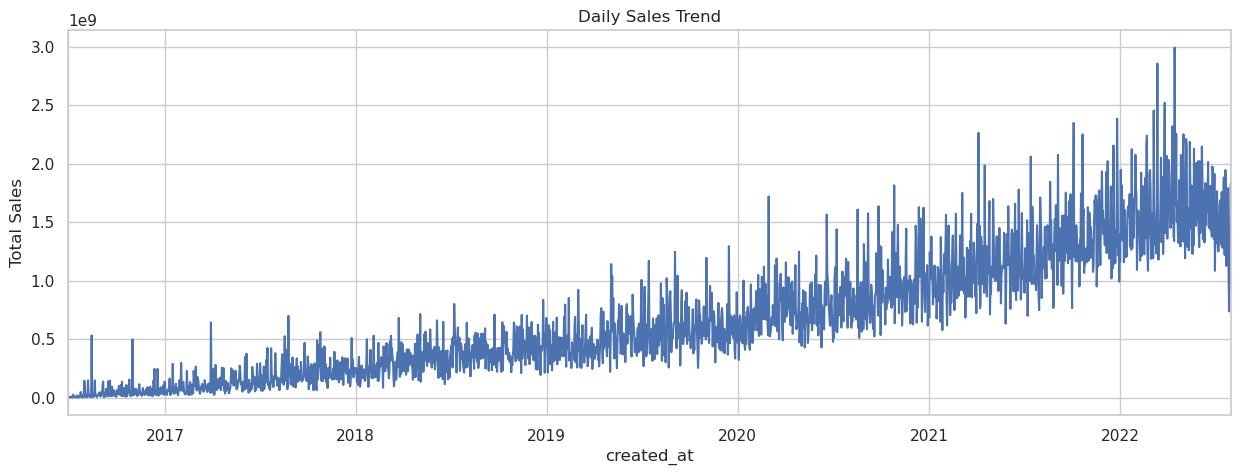

In [94]:
plt.figure(figsize=(15, 5))
daily_sales = df_transaction_trend['total_amount'].resample('D').sum()
daily_sales.plot()
plt.title('Daily Sales Trend')
plt.ylabel('Total Sales')
plt.show()

#### **_03.4.4. Apply the ARIMA model to the weekly sales forecasting problem_**

- Yếu tố xu hướng (trend) thể hiện đà tăng hoặc giảm của chuỗi trong tương lai. Chẳng hạn như lạm phát là xu hướng chung của các nền kinh tế, do đó giá cả trung bình của giỏ hàng hóa cơ sở hay còn gọi là chỉ số CPI luôn có xu hướng tăng và xu hướng tăng này đại diện cho sự mất giá của đồng tiền.
- Chúng ta xét hình `Weekly Sales Trend` Đồ thị về yếu tố xu hướng trong chuỗi thời gian của tổng doanh số

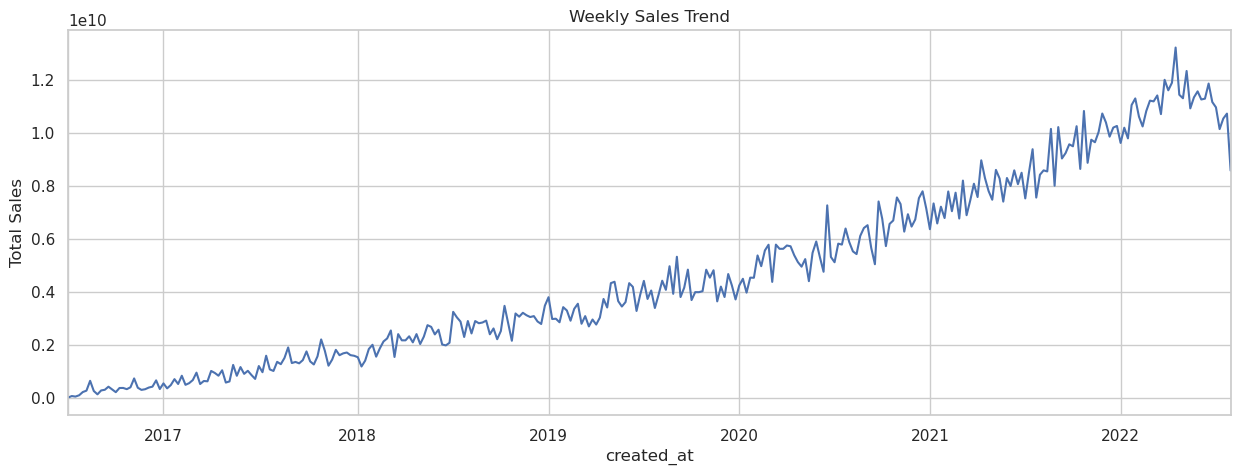

In [95]:
# Weekly sales trend (optional)
plt.figure(figsize=(15, 5))

weekly_sales = df_transaction_trend['total_amount'].resample('W').sum()
weekly_sales.plot()
plt.title('Weekly Sales Trend')
plt.ylabel('Total Sales')
plt.show()

Ta nhận thấy chuỗi có chu kì là 1 năm. Nhu cầu mua sắm trên sàn thương mại điện tử tăng vào những tháng khi bắt đầu dịch covid-19 bùng nổ, khi đó người dân ở nhà nên việc mua sắm tại nhà trở nên phổ biến hơn. Ngoài ra chúng ta có thể sử dụng một phép phân rã mùa vụ (seasonal decompose) để trích lọc ra các thành phần cấu thành nên chuỗi bao gồm: xu hướng (trend), mùa vụ (seasonal), phần dư (residual) như bên dưới:



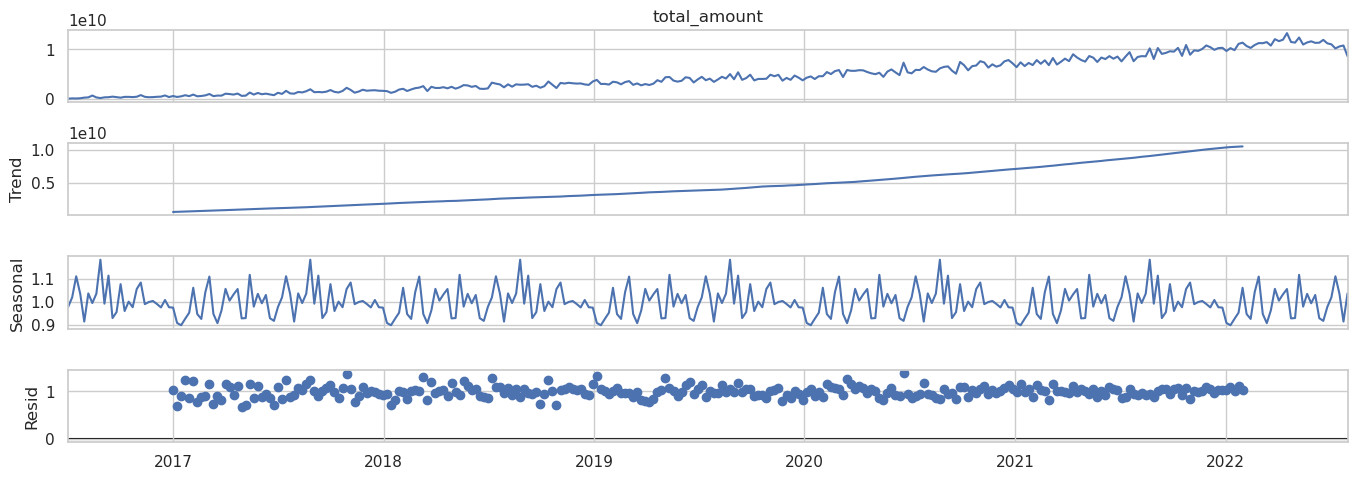

In [96]:
result = seasonal_decompose(weekly_sales, model='multiplicative')
fig = result.plot()
fig.set_size_inches(15, 5)

Như vậy các thành phần đã được tách ra khá rõ ràng như thể hiện trong biểu đồ trên. Tiếp theo ta sẽ cùng hồi qui mô hình SARIMA.



- **Phân chia tập train/test** Đầu tiên để thuận tiện cho việc kiêm định mô hình dự báo chúng ta sẽ phân chia tập train/test sao cho năm 2022 sẽ được sử dụng làm dữ liệu test và dữ liệu còn lại được sử dụng để huấn luyện mô hình.



In [97]:
train, test = weekly_sales[weekly_sales.index < '2022-01-01'], weekly_sales[weekly_sales.index >= '2022-01-01']
print('train shape: ', train.shape)
print('test shape: ', test.shape)

train shape:  (287,)
test shape:  (31,)


Chúng ta sẽ cùng kiểm tra xem các đặc tính tự tương quan và tương quan riêng phần của chuỗi mua hàng ra sao. Từ đó quyết định xem quá trình tự hồi qui và trung bình trượt của mô hình ARIMA nên nằm trong khoảng giá trị bao nhiêu và sử dụng phương pháp stepwise để tìm kiếm mô hình phù hợp nhất.

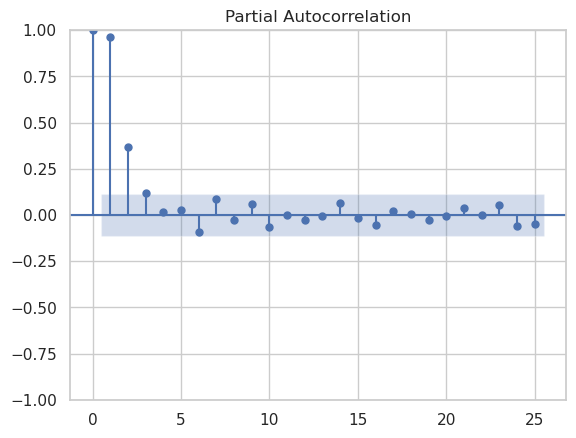

In [98]:
plot_pacf(train);

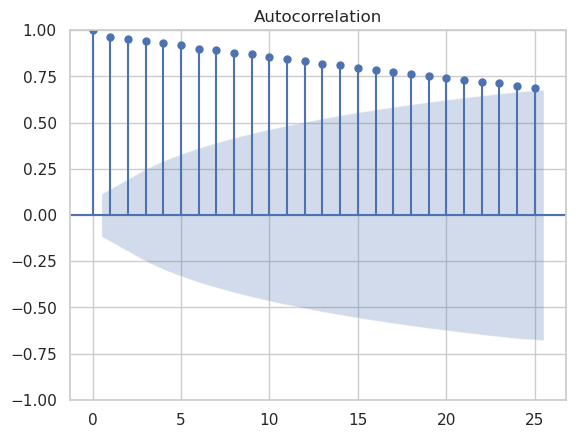

In [99]:
plot_acf(train);

Như vậy từ biểu đồ ta có thể lựa chọn bậc tự tương quan riêng phần PACF và tự tương quan ACF là các giá trị nhỏ hơn hoặc bằng 3. Do chuỗi có trend nên chúng ta sẽ lấy sai phân bậc 1 để tạo chuỗi dừng, hay nói cách khác bậc của intergration `d = 1`
. Ngoài ra chúng ta cần phải xác định thêm các bậc `(P,D,Q)`
 của yếu tố mùa vụ được trích xuất từ chuỗi ban đầu. Để mô hình hiểu được chúng ta đang hồi qui trên mô hình SARIMA thì cần thiết lập tham số seasonal=True và chu kì của mùa vụ m=12. Chiến lược stepwise sẽ tự động tìm cho ta một mô hình tốt nhất dựa trên tham số đã thiết lập.

In [100]:
model_sarima = auto_arima(train, start_p=0, start_q=0,
                           max_p=2, max_q=5, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=11956.349, Time=0.16 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=12069.868, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=11926.986, Time=0.21 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=11817.812, Time=0.21 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=11914.806, Time=0.09 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=11818.245, Time=0.37 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=11818.294, Time=0.46 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=11847.335, Time=0.22 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=11820.238, Time=0.79 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=11817.415, Time=0.30 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=11915.108, Time=0.15 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=11817.288, Time=0.42 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=11848.327, Time=0.34 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=11819.288, Time=0.93 sec
 ARIM

Phương pháp stepwise đã giúp chúng ta tìm được mô hình SARIMA tốt nhất cho bài toán dự báo như bên dưới:



In [101]:
model_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  287
Model:             SARIMAX(0, 1, 2)x(1, 1, [1], 12)   Log Likelihood               -5901.448
Date:                              Tue, 26 Dec 2023   AIC                          11812.895
Time:                                      14:54:46   BIC                          11830.961
Sample:                                  07-03-2016   HQIC                         11820.146
                                       - 12-26-2021                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9661      0.108     -8.948      0.000      -1.178      -0.754
ma.L2          0.1189      0.110      1.082      0.279      -0.096       0.334
ar.S.L12      -0.1485      0.139     -1.072      0.284      -0.420       0.123
ma.S.L12      -0.8111      0.117     -6.946      0.000      -1.040      -0.582
sigma2      4.829e+17   1.48e-19   3.27e+36      0.000    4.83e+17    4.83e+17
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                14.08
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               6.18   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.17e+51. Standard errors may be unstable.
"""

Sau khi đã tìm ra được mô hình ARIMA tốt nhất. Chúng ta sẽ dự báo cho khoảng thời gian tiếp theo. Dự báo cho chuỗi thời gian khá đặc thù và khác biệt so với các lớp mô hình dự báo khác vì giá trị time step liền trước sẽ được sử dụng để dự báo cho time step liền sau. Do đó đòi hỏi phải có một vòng lặp liên tiếp dự báo qua các bước thời gian.



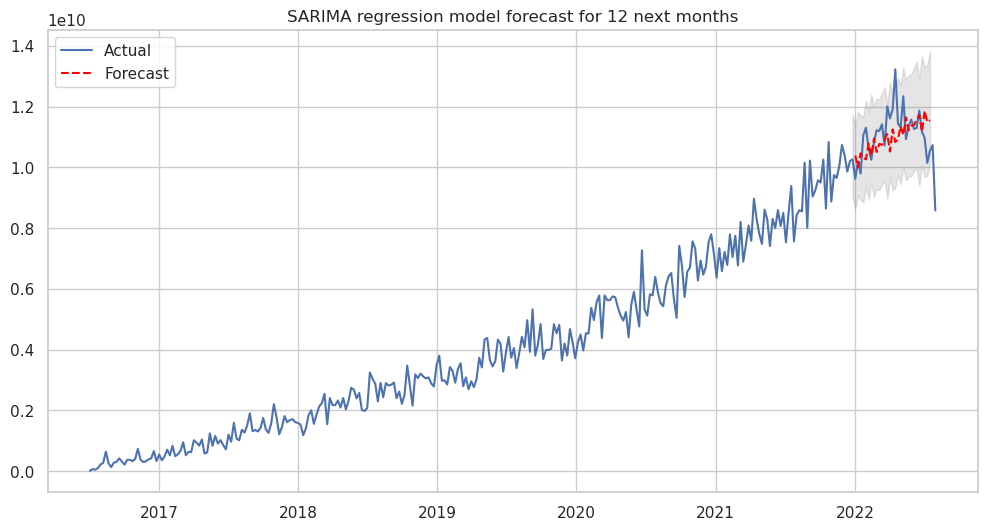

In [102]:
n_pred_perious = 30
fitted, confint = model_sarima.predict(n_periods=n_pred_perious, return_conf_int=True)
date = pd.date_range(train.index[-1], periods=n_pred_perious, freq='W')

fitted_seri = pd.Series(fitted, index=date)
lower = confint[:, 0]
upper = confint[:, 1]

plt.figure(figsize=(12, 6))
plt.plot(weekly_sales[-318:], label='Actual')
plt.plot(fitted_seri, color='red', linestyle='--', label = 'Forecast')
plt.fill_between(date,
                 lower,
                 upper,
                 color='grey', alpha=0.2)
# plt.ylim((0, 130))
plt.legend()
plt.title('SARIMA regression model forecast for 12 next months')
plt.show()

- Chúng ta có thể thấy rằng mô hình đã dự đoán được doanh thu của sàn thương mại điện tử Fashion Campus. Mặc dù ở giai đoạn cuối năm 2022 doanh thu của công ty có sụt giảm, nhưng nhìn chung từ mô hình Arima chúng ta có thể dự đoán được một phần nào đó doanh thu của công ty.
- Mô hình Arima dụ đoán kết quả chưa thể hiện được sự biến đổi mạnh của doanh thu, như đã thể hiện trong hình so sánh doanh thu theo mùa, thì chúng ta thấy dữ liệu biến động mạnh là do mùa xuân lượng người mua rất ít.


#### **_03.4.5. Profit trends over time for individual industries_**


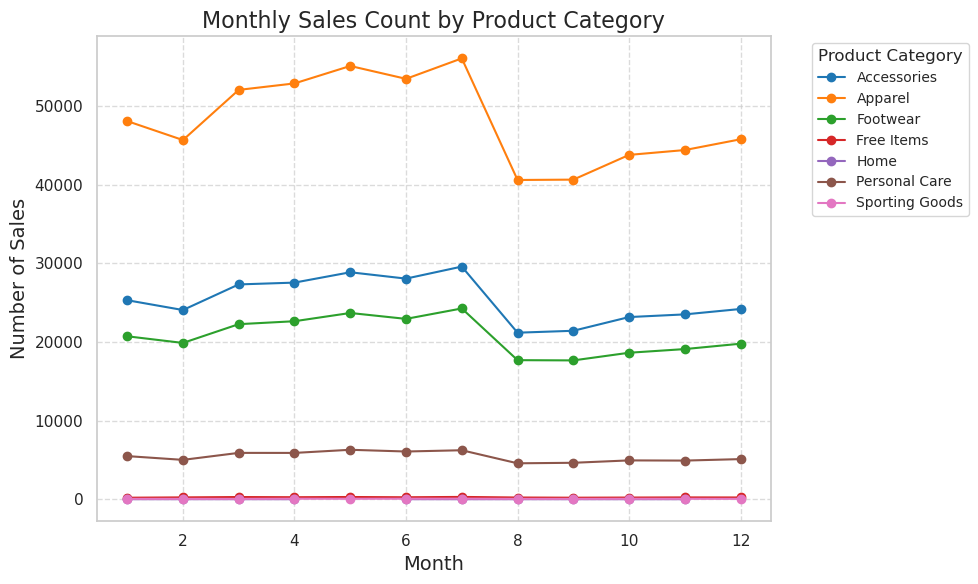

In [103]:
# Merging data
df_trans_prod = df_transaction[['created_at', 'customer_id', 'product_id']].merge(df_product[['product_id', 'masterCategory', 'gender']])

# Creating a copy of the dataframe for modification
df_trans_prod_create = df_trans_prod.copy()

# Converting 'created_at' to datetime and setting it as index
df_trans_prod_create['created_at'] = pd.to_datetime(df_trans_prod_create['created_at'])
df_trans_prod_create.set_index('created_at', inplace=True)

# Grouping by month and 'masterCategory' and getting the sales count
monthly_product_sales = df_trans_prod_create.groupby([df_trans_prod_create.index.month, 'masterCategory']).size().unstack()

# Plotting
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
monthly_product_sales.plot(color=colors, marker='o', figsize=(10, 6))

# Title and labels
plt.title('Monthly Sales Count by Product Category', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Sales', fontsize=14)

# Legend
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

# Grid
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()

- Chúng ta có thể thấy rằng ngành hàng `Apparel` (Trang phục) luôn đạt lợi nhuận cao nhất theo thời gian.
- Tiếp theo đó là ngành hàng `Accessories` (Phụ kiện) đi theo. Chúng ta cũng dễ hiểu rằng đây là hai mặt hàng có quan hệ mật thiết với nhau.

## **_04. Reflection:_**

### **_4.1. What difficulties have you encountered?_**

#### **_0.4.1.1. Phan Than An - 21127003_**

- Khó khăn trong việc tìm dữ liệu sao cho phù hợp, đủ lớn để thực hiện được các phân tích và đủ tin cậy
- Sau khi có đủ dữ liệu gặp thêm vấn đề về dữ liệu chia thành các file excel, vì vậy gặp một chút khó khăn khi hiểu hết dữ liệu
- Khó khăn trong việc sử dụng một số thuật toán như Arima, Apriori

#### **_4.1.2. Phạm Hồng Gia Bảo - 21127014_**

- Kĩ năng sử dụng các thư viện như Numpy, Pandas và Matplotlib vẫn chưa thực sự tốt nên có gặp chút khó khăn trong xử lý dữ liệu và trực quan hóa dữ liệu để hiểu dữ liệu hơn
- Khi đặt câu hỏi, em có khá nhiều câu hỏi tuy nhiên để đặt được một câu hỏi chất lượng cần phải tìm hiểu nhiều thứ
- Khó khăn để hiểu rõ thuật toán phân cụm KMean

### **_4.2. What have you learned?_**

#### **_4.2.1. Phan Than An - 21127003_**

- Hiểu rõ hơn quy trình xử lý dữ liệu sao cho chi tiết và đầy đủ
- Hiểu hơn về các thư viện quan trọng trong việc xử lý dữ liệu và trực quan hóa dữ liệu như: pandas, numpy, seaborn.
- Biết cách xây dựng mô hình dự đoán cho các bài toán bán hàng trên sàn thương mại điện tử

#### **_4.2.2. Phạm Hồng Gia Bảo - 21127014_**

- Khả năng quản lí mã nguồn bằng github và kỹ thuật chia branch
- Từ nguồn dữ liệu lớn, em cũng tìm được nhiều bài toán cần giải quyết cũng như các câu hỏi đặt ra.

### **_4.3. If you had more time, what would you do?_**

- Cải thiện mô hình Arima ở trong câu hỏi thứ 4. Tại biến động của mô hình chưa thực sự tốt
- Tìm hiểu thêm bộ dữ liệu `click.csv` có trong bộ dữ liệu này. Nó là một bộ dữ liệu lớn với dung lượng 1.2GB, chứa nhiều thông tin về các cú click của người dùng. Từ đó em có thể phân tích được nhiều thứ hơn.

## **_05. References:_**

[1] [Dataset](https://www.kaggle.com/datasets/latifahhukma/fashion-campus)

[2] [Slides in Moodle](https://drive.google.com/drive/folders/1FyzNTCs_xpx-CUVBw_VwXlEt73tf8ywX)

[3] [Sklearn](https://scikit-learn.org/stable/)

[4] [Apriori](https://www.geeksforgeeks.org/implementing-apriori-algorithm-in-python/)

[5] [Arima](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)